In [10]:
import pybullet as p
import pybullet_data
import os
import time

import pybullet as p
import pybullet_data as pd
import math
import time

p.connect(p.GUI, options="--opengl2")
p.setAdditionalSearchPath(pd.getDataPath())
base_path = pd.getDataPath()
print(pd.getDataPath())

C:\Users\Roxanne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pybullet_data


In [11]:
p.resetSimulation()

p.setGravity(0, 0, -10)
planeId = p.loadURDF(os.path.join(base_path, "plane.urdf"))
cubeStartPos = [0, 0, .5]
cubeStartOrientation = p.getQuaternionFromEuler([0, 0, 0])
bip_path = "bip/Bip.SLDASM/urdf/Bip.SLDASM.urdf"
bip = p.loadURDF(bip_path, cubeStartPos, cubeStartOrientation, useFixedBase = False)
cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)

useRealTimeSimulation = 0

In [23]:
def motor_control_pos(motors, Pos, robot):
    # Input:  motors n x 1 matrix with motor index (int)
    #         Pos    n x 1 matrix with desired motor position (float)
    
    Maxforce = 500
    p.setJointMotorControlArray(robot, motors, targetPositions = Pos, controlMode=p.POSITION_CONTROL)
    
def get_motor_info(robot):
    # Input:  Robot 1
    # Ouput:  info: num joints x [joint pos, joint Velocity, jointReactionForces, appliedJointMotorTorque]
    info = np.array(p.getJointState(robot, 0))
    for i in range(p.getNumJoints(robot)):
        num_mot = p.getJointState(robot, i)
        info[i] = num_mot
    return num_mot
print(get_motor_info(bip))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [7]:
for i in range (1000):
    p.stepSimulation()
    time.sleep(1./240)
    target = 3
    pos = target/100*i
    motor_control_pos([0],[pos], bip)
    
robotPos, robotOrn = p.getBasePositionAndOrientation(boxId)
joint_pos = getJointState()
print(robotPos,robotOrn)

error: Not connected to physics server.

rgba shape=(200, 320, 4), dtype=uint8


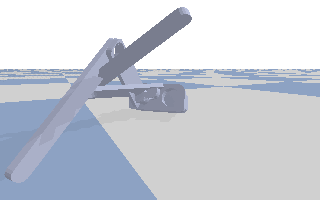

depth shape=(200, 320), dtype=float32, as values from 0.0 (near) to 1.0 (far)


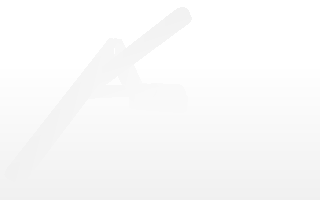

mask shape=(200, 320), dtype=int32, as unique values from 0 to N-1 entities, and -1 as None


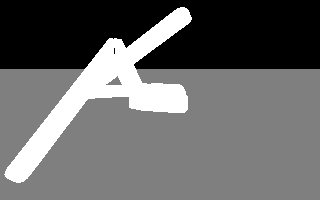

In [5]:
import numpy as np
from PIL import Image
from IPython.display import display

width = 320
height = 200
img_arr = p.getCameraImage(
    width,
    height,
    viewMatrix=p.computeViewMatrixFromYawPitchRoll(
        cameraTargetPosition=cubePos,
        distance=.5,
        yaw=60,
        pitch=-10,
        roll=0,
        upAxisIndex=2,
    ),
    projectionMatrix=p.computeProjectionMatrixFOV(
        fov=60,
        aspect=width/height,
        nearVal=0.01,
        farVal=100,
    ),
    shadow=True,
    lightDirection=[1, 1, 1],
)

width, height, rgba, depth, mask = img_arr
print(f"rgba shape={rgba.shape}, dtype={rgba.dtype}")
display(Image.fromarray(rgba, 'RGBA'))
print(f"depth shape={depth.shape}, dtype={depth.dtype}, as values from 0.0 (near) to 1.0 (far)")
display(Image.fromarray((depth*255).astype('uint8')))
print(f"mask shape={mask.shape}, dtype={mask.dtype}, as unique values from 0 to N-1 entities, and -1 as None")
display(Image.fromarray(np.interp(mask, (-1, mask.max()), (0, 255)).astype('uint8')))


In [6]:
p.disconnect()